# Images in Python
An introduction to render images in Python by [Dr. Yi-Xin Liu](http://www.yxliu.group) at Fudan University (lyx@fudan.edu.cn)<br>
This is a part of the course: *Road to Scientific Research: Powerful Computer Applications* (XDSY118019.01)  
Lecture date: 2024.10.24

source: https://github.com/liuyxpp/XDSY118019/blob/main/05_python_images.ipynb

This tutorial is adapted from the `matplotlib` [official tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html) with a few modifications.

## Load Packages

To render an image with `matplotlib`, we have to import related sub-packages, i.e., `matplotlib.pyplot` and `matplotlib.image`.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Importing image data into Numpy arrays

Here's the image we're going to play with:

![stinkbug.png](stinkbug.png)

It's a 24-bit RGB PNG image (8 bits for each of R, G, B channels). Depending on where you get your data, the other kinds of image that you'll most likely encounter are RGBA images, which allow for transparency, or
single-channel grayscale (luminosity) images.
Download [stinkbug.png](https://raw.githubusercontent.com/matplotlib/matplotlib/main/doc/_static/stinkbug.png) and put it in the same folder as this Jupyter notebook file for the rest of this tutorial.

And here we go...

In [2]:
img = mpimg.imread('stinkbug.png')
print(img)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


Note the dtype there - `float32`. Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0. As a side note, the only datatype that Pillow can work with is uint8. Matplotlib plotting can handle float32 and uint8, but image reading/writing for any format other than PNG is limited to uint8 data. Why 8 bits? Most displays can only render 8 bits per channel worth of color gradation. Why can they only render 8 bits/channel? Because that's about all the human eye can see. More here (from a photography standpoint): [Luminous Landscape bit depth tutorial](https://luminous-landscape.com/bit-depth/).

Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it's a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency), has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For RGB and RGBA images, Matplotlib supports float32 and uint8 data types. For grayscale, Matplotlib supports only float32.  If your array data does not meet one of these descriptions, you need to rescale it.

In [3]:
img.shape

(375, 500, 3)

## Plotting Numpy arrays as images

So, you have your data in a Numpy array (either by importing it, or by
generating it).  Let's render it.  In Matplotlib, this is performed
using the `matplotlib.pyplot.imshow` function. Here we'll grab
the plot object. This object gives you an easy way to manipulate the
plot from the prompt.

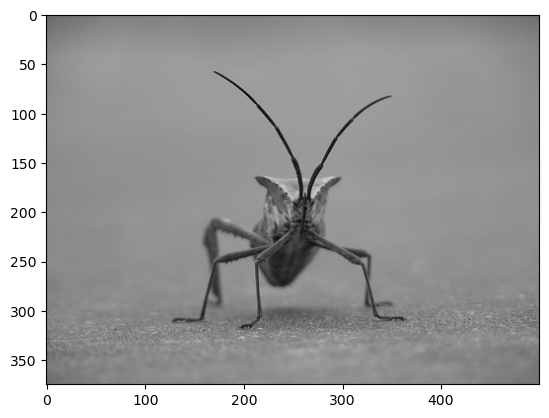

In [4]:
imgplot = plt.imshow(img)

Actually, any Numpy array with shape (M, N) or (M, N, 3) or (M, N, 4) can be rendered by `imshow`.

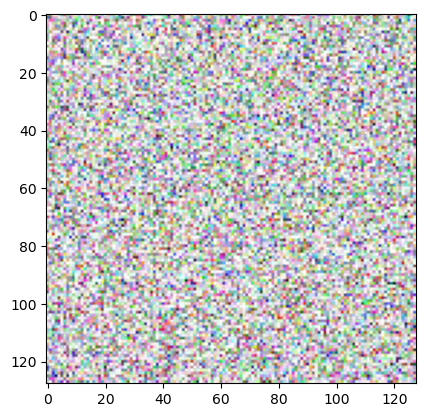

In [5]:
plt.imshow(np.random.random(size=(128, 128, 4)))  # uniform random noise image

### Applying pseudocolor schemes to image plots

Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar (see for yourself above or in your data), we can just pick one channel of our data:

In [6]:
lum_img = img[:, :, 0]

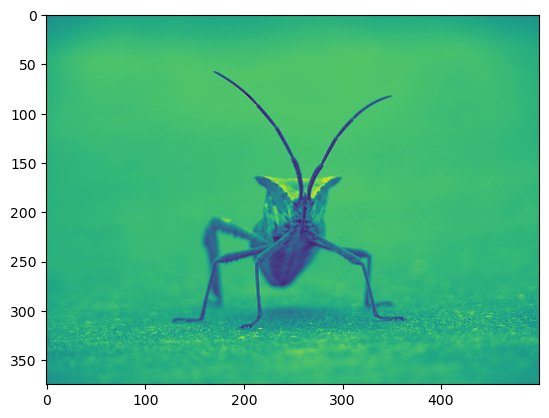

In [7]:
plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table, LUT), is applied. The default is called "viridis". There are plenty of others to choose from (see [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for a list of available colormaps).

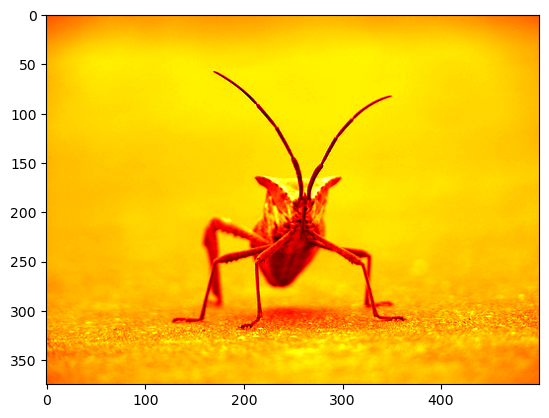

In [8]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using the method `set_cmap` method:

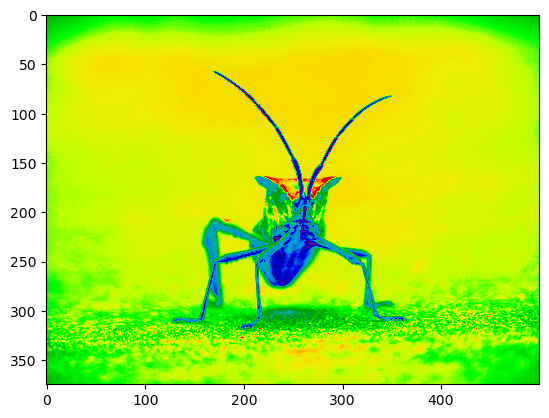

In [9]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

### Color scale reference

It's helpful to have an idea of what value a color represents. We can do that by adding a color bar to your figure:

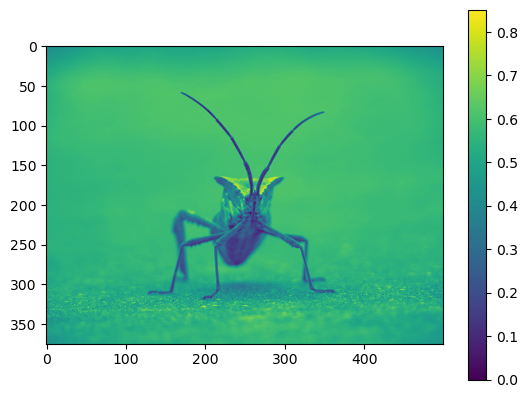

In [10]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

### Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don't vary much, or don't matter. A good tool to find interesting regions is the histogram. To create a histogram of ourimage data, we use the function `hist` function:

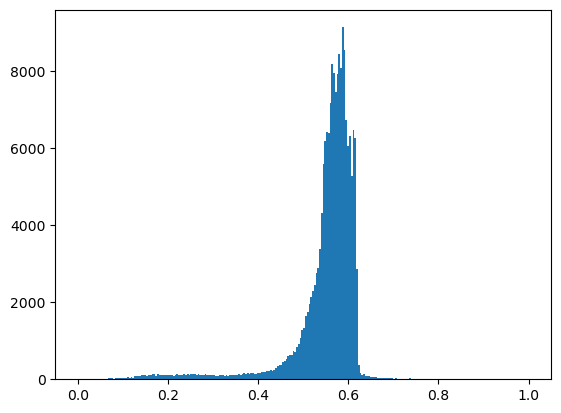

In [11]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0))
plt.show()

Most often, the "interesting" part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there's not much useful information in the high end (not many white things in the image). Let's adjust the upper limit, so that we effectively "zoom in on" part of the histogram. We do this by passing the clim argument to `imshow`. You could also do this by calling the `set_clim` method of the image plot object, but make sure that you do so in the same cell as your plot command when working with the Jupyter Notebook - it will not change plots from earlier cells.

You can specify the clim in the call to `plot`.

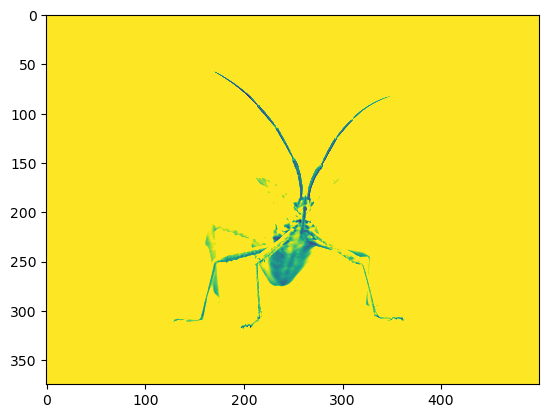

In [12]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.3))

You can also specify the clim using the returned object:

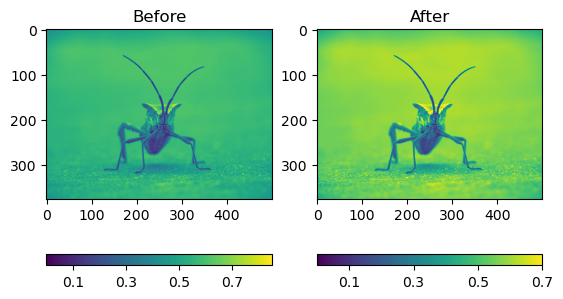

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

### Array Interpolation schemes

Interpolation calculates what the color or value of a pixel "should" be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there's missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let's take our image and shrink it. We're effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren't there anymore, and the computer has to draw in pixels to fill that space.

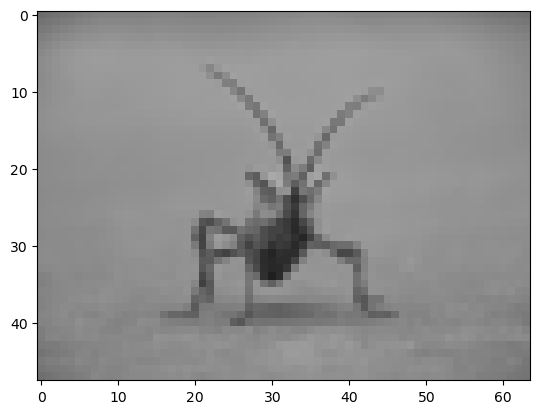

In [14]:
from PIL import Image

img = Image.open('stinkbug.png')
img.thumbnail((64, 64))  # resizes image in-place
imgplot = plt.imshow(img)

Here we have the default interpolation, bilinear, since we did not give `imshow` any interpolation argument.

Let's try some others. Here's "nearest", which does no interpolation.

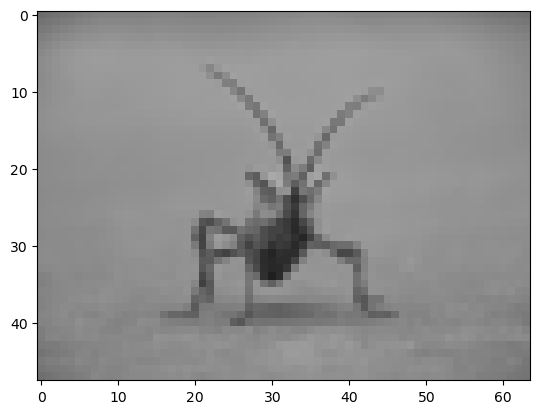

In [15]:
imgplot = plt.imshow(img, interpolation="nearest")

and bicubic:

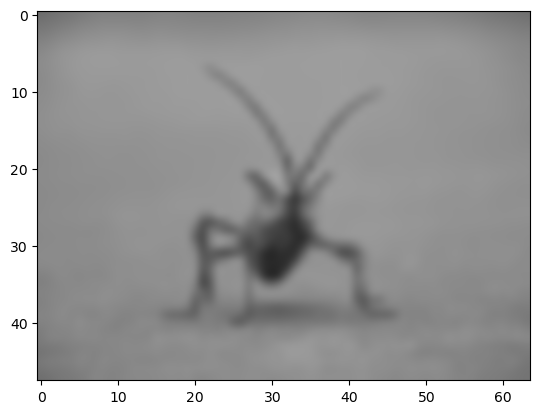

In [16]:
imgplot = plt.imshow(img, interpolation="bicubic")

Bicubic interpolation is often used when blowing up photos - people tend to prefer blurry over pixelated.